### PCA (Principal Component Analysis)
PCA is a dimensionality reduction technique based off SVD, one could claim it to be a "statistical interpretation of SVD", because it is based on also calculating statistical measures.

Consider having an $N\times D$ matrix $X$. We assume that some combinations of features could describe overall statistical distribution of $X$ the best. THe next algorithm for calculating the PCA is as follows:
- First off we compute **row-wise means** which result into vector $\bar{x}$. Having computed means we get the $\text{Mean Matrix}=J_{N\times1}\times\bar{x}$, where $J$ - is a matrix consisting of only 1's. We will denote $\text{Mean Matrix}$ as $\bar{X}$.
- Calculate mean-centered ($\mu=0$) $X$ as $B=X-\bar{X}$
- Calculate the sample covariance matrix (https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices): $C=\frac{B^TB}{(N-1)}$
- We then calculate eigenvectors and eigenvalues of $C$ to understand the overall direction and magnitude of the data span. How does covariance matrix show us this visually is explained here: https://youtu.be/g-Hb26agBFg?t=740
- By sorting through eigen values we can select top $K$ and then project the data by multiplying $Z=V_K^T\times X$, where $V_K$ is a vector of eigenvectors. $K$ first columns will correspond to $K$ top eigen values.
- Given projections we can also reconstruct (approximately) $X=V\times Z$

### Relation between PCA and SVD
Most of implementations rely on SVD when carrying out PCA, because of how efficient the algorithm is. Consider we have an SVD $X=USV^T$, then the $X^TX=VDV^T$, where $D=S^TS$. Multiplying both sides of the equation would yeild $(X^TX)V=VD$, since $V$ is an orthogonal matrix ($V^TV=I$). This would yield, in its turn, eigen values and eigen vectors for the same covariance matrix, although not scaled by $N-1$.

### Practical application on MNIST

<Figure size 640x480 with 0 Axes>

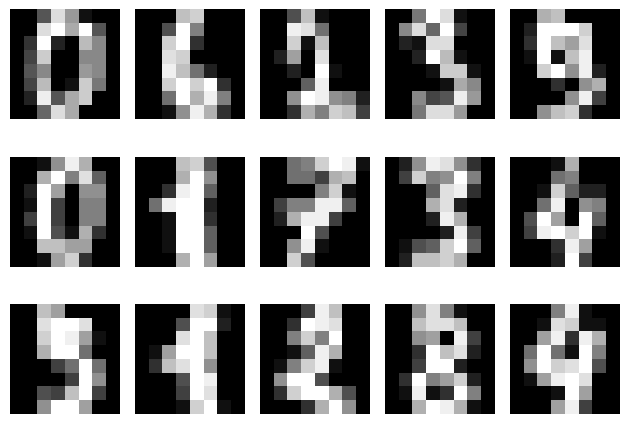

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

ds = load_digits()
ds.keys()

plt.set_cmap('gray')
rows, cols = 5, 3
fig, axs = plt.subplots(cols, rows)
for i in range(cols*rows):
    x, y = i % rows, i % cols
    axs[y, x].imshow(ds.data[i].reshape(8, 8))
    axs[y, x].axis('off')
fig.tight_layout()

Convert digits to dataframe, where each column will be responsible to an individual feature, that is a brightness value on each of 64 pixels

In [9]:
import pandas as pd

df = pd.DataFrame(ds.data,columns=ds.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


This can now be scaled to a lower dimension via PCA framework

In [17]:
from sklearn.decomposition import PCA

precentOfFeatures = .84 # keep K up to 90% of D
pca = PCA(precentOfFeatures)
x_pca = pca.fit_transform(df.values)
x_pca.shape

(1797, 16)

In [24]:
# extracting eigen values and their volumes

pca.explained_variance_, pca.explained_variance_ratio_

(array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
         69.51316559,  59.10852489,  51.88453911,  44.01510667,
         40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
         21.90148814,  21.32435654,  17.63672222,  16.94686385]),
 array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
        0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
        0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
        0.01409716]))